In [1]:
from itertools import combinations,permutations
from random import shuffle
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
from tqdm import tqdm


In [2]:
scenario = 'reopen/no lockdown'
simulation_results = os.listdir(scenario)
data = pd.read_excel('C:/Users/Administrator/Desktop/深圳市疫情课题/data/0309粤港跨境司机关联本土疫情-简表 脱敏版.xlsx')


In [3]:
# calculate the mean, std for each column (day)

def calculate_mean_std(series):
    mean = series.mean()
    std = series.std()
    return list([mean,std])

In [4]:
simulation_results

['0.csv',
 '1.csv',
 '10.csv',
 '11.csv',
 '12.csv',
 '13.csv',
 '14.csv',
 '15.csv',
 '16.csv',
 '17.csv',
 '18.csv',
 '19.csv',
 '2.csv',
 '20.csv',
 '21.csv',
 '22.csv',
 '23.csv',
 '24.csv',
 '25.csv',
 '26.csv',
 '27.csv',
 '28.csv',
 '29.csv',
 '3.csv',
 '4.csv',
 '5.csv',
 '6.csv',
 '7.csv',
 '8.csv',
 '9.csv']

In [5]:
plt.style.use('ggplot')
def plot_infetctions(data_asym,data_sym,data_icu,daily_infection,reinfection,sequela1,sequela2,lenth):
    upper_bound1 = data_asym.loc[0,:] + data_asym.loc[1,:]*1.96/(30**0.5)
    lower_bound1 = data_asym.loc[0,:] - data_asym.loc[1,:]*1.96/(30**0.5)
    
    upper_bound2 = data_sym.loc[0,:] + data_asym.loc[1,:]*1.96/(30**0.5)
    lower_bound2 = data_sym.loc[0,:] - data_asym.loc[1,:]*1.96/(30**0.5)
    
    upper_bound3 = data_icu.loc[0,:] + data_icu.loc[1,:]*1.96/(30**0.5)
    lower_bound3 = data_icu.loc[0,:] - data_icu.loc[1,:]*1.96/(30**0.5)
    
    upper_bound4 = daily_infection.loc[0,:] + daily_infection.loc[1,:]*1.96/(30**0.5)
    lower_bound4 = daily_infection.loc[0,:] - daily_infection.loc[1,:]*1.96/(30**0.5)
    
    upper_bound5 = reinfection.loc[0,:] + reinfection.loc[1,:]*1.96/(30**0.5)
    lower_bound5 = reinfection.loc[0,:] - reinfection.loc[1,:]*1.96/(30**0.5)
    
    upper_bound6 = sequela1.loc[0,:] + sequela1.loc[1,:]*1.96/(30**0.5)
    lower_bound6 = sequela1.loc[0,:] - sequela1.loc[1,:]*1.96/(30**0.5)
    
    upper_bound7 = sequela2.loc[0,:] + sequela2.loc[1,:]*1.96/(30**0.5)
    lower_bound7 = sequela2.loc[0,:] - sequela2.loc[1,:]*1.96/(30**0.5)
    #plt.suptitle('simulation results')
    
    fig = plt.figure(dpi=1000)

    ax1 = plt.subplot(2, 2, 1)
    ax4 = plt.subplot(2, 2, 2)
    ax2 = plt.subplot(2, 2, 3)
    # third axes that spans both rows in second column:
    ax3 = plt.subplot(2, 2, 4)
    
    #ax1.plot(data_asym.loc[0,:],label='asymptomatic cases',c='yellow')
    #ax1.fill_between(x=range(179),y1=lower_bound1,y2=upper_bound1,alpha=0.3,facecolor='yellow')
    ax1.plot(data_sym.loc[0,0:lenth],label='Symptomatic cases',c='orange',alpha=0.7)
    ax1.plot(data_asym.loc[0,0:lenth],label='Asymptomatic cases',c='yellow',alpha=0.7)
    ax1.plot(data_icu.loc[0,0:lenth],label='Severe cases',c='firebrick',alpha=0.7)
    #ax1.fill_between(x=range(180),y1=lower_bound2,y2=upper_bound2,alpha=0.3,facecolor='orange')
    ax1.legend(fontsize=6)
    #ax1.set_title("Current cases",fontsize=8)
    ax1.tick_params(axis='x', labelsize=5 )
    ax1.tick_params(axis='y', labelsize=5 )
    ax1.set_title('Existing cases',fontsize=7)
    
    ax4.plot(reinfection.loc[0,0:lenth],label='Reinfection cases',c='orange',alpha=0.7)
    ax4.plot(sequela1.loc[0,0:lenth],label='Sequela_A cases',c='yellow',alpha=0.7)
    ax4.plot(sequela2.loc[0,0:lenth],label='Sequela_B cases',c='firebrick',alpha=0.7)
    #ax1.fill_between(x=range(180),y1=lower_bound2,y2=upper_bound2,alpha=0.3,facecolor='orange')
    ax4.legend(fontsize=6)
    #ax1.set_title("Current cases",fontsize=8)
    ax4.tick_params(axis='x', labelsize=5 )
    ax4.tick_params(axis='y', labelsize=5 )
    ax4.set_title('Cases with sequela symptoms',fontsize=7)
    
    
    ax2.plot(daily_infection.loc[0,0:lenth],label='Daily cases',c='r',alpha=0.3)
    ax2.fill_between(x=range(lenth),y1=lower_bound4[0:lenth],y2=upper_bound4[0:lenth],alpha=0.9,label='95%CI',facecolor='lightcoral')
    ax2.legend(fontsize=6)
    #ax2.set_xlabel('days')
    #ax2.set_title("Daily cases",fontsize=8)
    ax2.tick_params(axis='x', labelsize=5 )
    ax2.tick_params(axis='y', labelsize=5 )
    ax2.set_title('Daily new cases',fontsize=7)
    
    ax3.plot(daily_infection.loc[0,0:lenth].cumsum(),label='Cumulative cases',c='deeppink')
    #ax3.fill_between(x=range(180),y1=lower_bound4,y2=upper_bound4,alpha=0.3,label='bounds',facecolor='red')
    ax3.legend(fontsize=6)
    #ax3.set_xlabel('days')
    #ax3.set_title("Cumulative cases",fontsize=8)
    ax3.tick_params(axis='x', labelsize=5 )
    ax3.tick_params(axis='y', labelsize=5 )
    ax3.set_title('Cumulative cases',fontsize=7)
    
    plt.tight_layout()
    return

# extension algorithm

In [6]:
def delay_add(index,subdata,delta=np.random.randint(0,4)):
    extended_array = subdata.loc[index[0]]
    for i in index[1:]:
        extended_array = extended_array + subdata.loc[i].shift(delta,fill_value=0)*np.random.uniform(0.5,3)
    return extended_array

In [137]:
def extend(data,subregions,inputrounds,outputrounds,delta=np.random.randint(0,4)):
    extended_arrays = []
    for i in range(outputrounds):
        select_index = np.random.randint(inputrounds,size=subregions)
        extended = delay_add(select_index,data,delta=delta)
        extended_arrays.append(extended)    
    return extended_arrays

# residential community

In [11]:
community_asym = []
community_sym = []
community_ICU = []
community_daily_infection = []
community_sequela1 = []
community_sequela2 = []
community_reinfection = []
for i in simulation_results:
    add = pd.read_csv('reopen/no lockdown/'+i,index_col=0)
    community_asym.append(add['I_asym'].values)
    community_sym.append(add['I_sym'].values)
    community_ICU.append(add['ICU'].values)
    community_daily_infection.append(add['Daily_infected'].values)
    community_reinfection.append(add['Reinfection'].values)
    community_sequela1.append(add['Sequela 1'])
    community_sequela2.append(add['Sequela 2'])

simulation_community_asym = pd.DataFrame(community_asym)
simulation_community_sym = pd.DataFrame(community_sym)
simulation_community_ICU = pd.DataFrame(community_ICU)
simulation_community_daily_infection = pd.DataFrame(community_daily_infection)
simulation_community_reinfection =  pd.DataFrame(community_reinfection)
simulation_community_sequela1 = pd.DataFrame(community_sequela1)
simulation_community_sequela2 = pd.DataFrame(community_sequela2)


stat_I_asym = simulation_community_asym.apply(calculate_mean_std,axis=0)
stat_I_sym = simulation_community_sym.apply(calculate_mean_std,axis=0)
stat_ICU = simulation_community_ICU.apply(calculate_mean_std,axis=0)
stat_daily_infection = simulation_community_daily_infection.apply(calculate_mean_std,axis=0)
stat_reinfection = simulation_community_reinfection.apply(calculate_mean_std,axis=0)
stat_sequela1 = simulation_community_sequela1.apply(calculate_mean_std,axis = 0)
stat_sequela2 = simulation_community_sequela2.apply(calculate_mean_std,axis = 0)

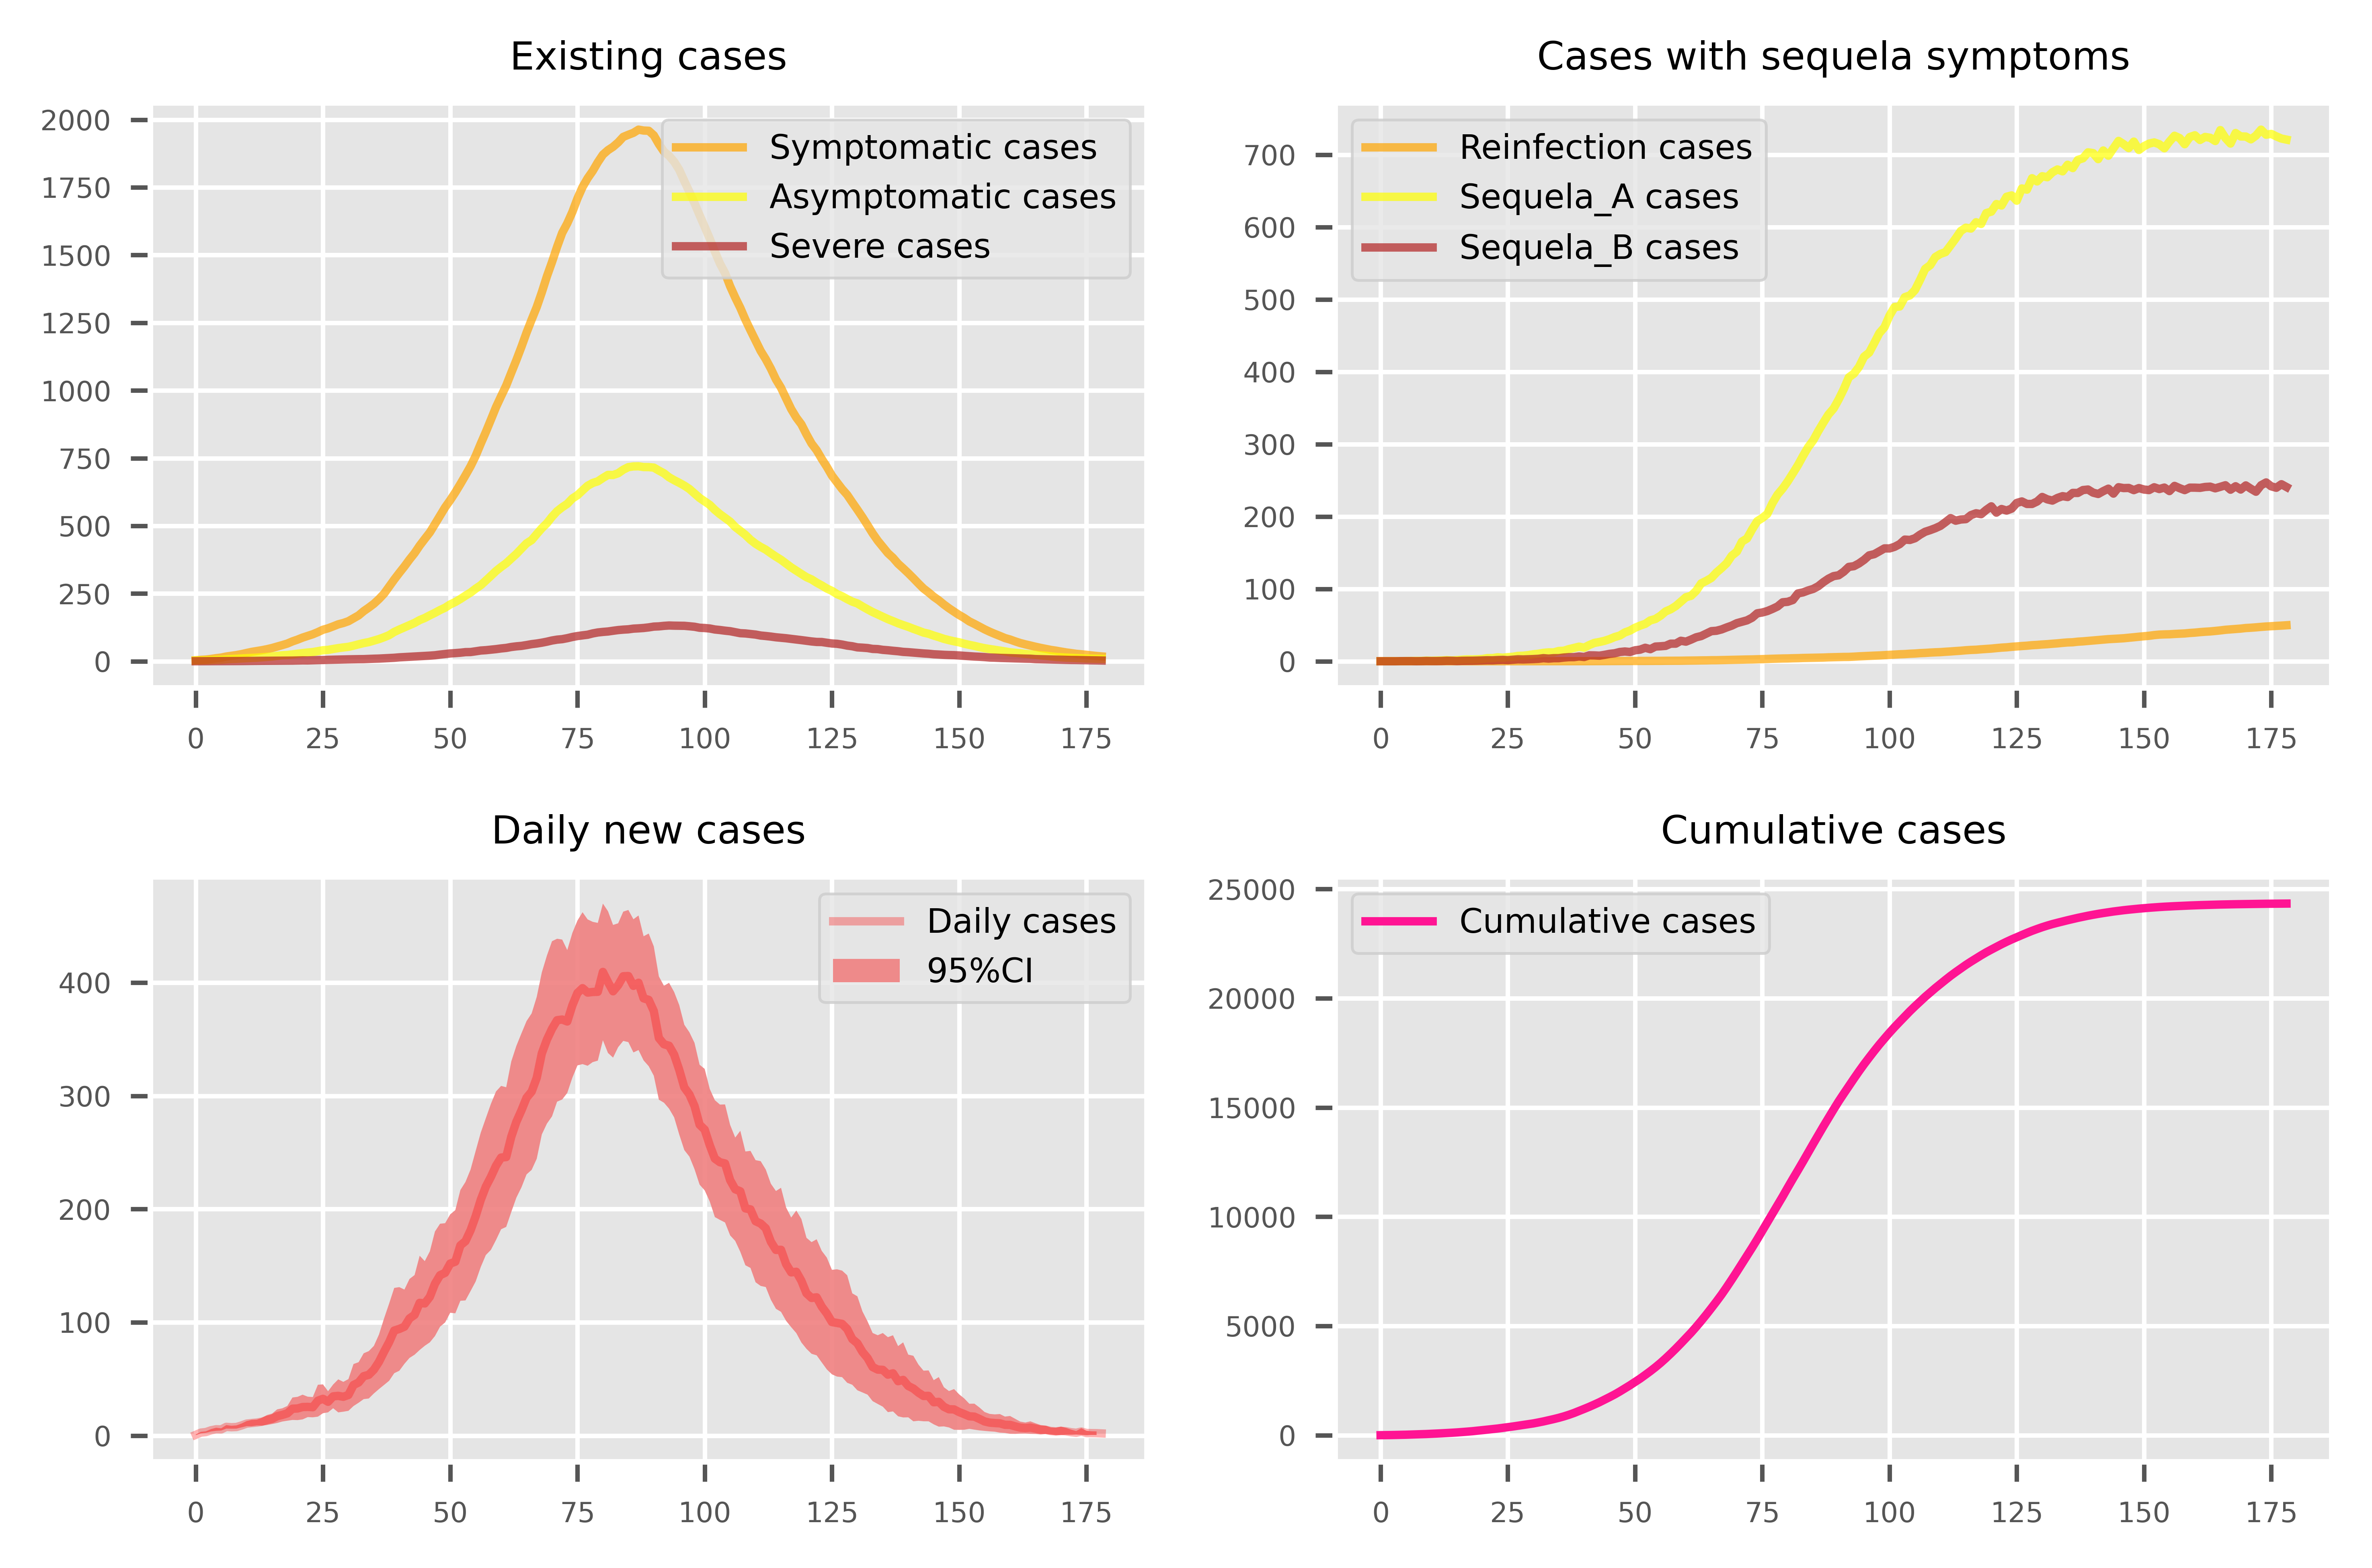

In [29]:
plot_infetctions(stat_I_asym,stat_I_sym,stat_ICU,stat_daily_infection,stat_reinfection.cumsum(axis=1),stat_sequela1,stat_sequela2,178)
plt.savefig('test')

In [28]:
stat_reinfection.cumsum(axis=1)

0    1    2    3    4    5    6    7    8    9    ...        170  \
0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  45.900000   
1  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  71.695073   

         171        172        173        174        175        176  \
0  46.300000  46.833333  47.466667  48.000000  48.433333  48.833333   
1  72.258315  72.939760  73.704650  74.604203  75.378058  76.052722   

         177       178        179  
0  49.233333  49.70000  50.100000  
1  76.615964  77.12338  77.847354  

[2 rows x 180 columns]

In [9]:
# save csv
save_scenario = 'no lockdown results//'
stat_I_asym.to_csv(save_scenario+'community asym.csv')
stat_I_sym.to_csv(save_scenario+'community sym.csv')
stat_ICU.to_csv(save_scenario+'community severe.csv')
stat_daily_infection.to_csv(save_scenario+'//community daily infection.csv')

# extension results

In [72]:
output_variable = add.columns.values

In [79]:
pd.DataFrame(extend(pd.DataFrame(community_asym),7,30,30))

0    1    2    3    4    5    6    7    8    9    ...  170  171  172  173  \
0     2   12    9   10   10   18   26   32   39   41  ...   32   31   26   17   
1     1   11   11   12   14   20   19   27   31   38  ...  168  157  147  146   
2     2   13   16   16   18   19   26   34   43   51  ...   51   50   48   42   
3     2    9   12   14   20   24   21   30   32   32  ...   32   30   31   29   
4     2   10   12   11   14   19   25   34   50   56  ...   67   65   57   46   
5     0   14   16   22   25   30   29   28   35   39  ...   10    8   10    9   
6     3   18   18   21   22   26   28   36   37   52  ...  152  131  118  105   
7     2   18   17   17   17   22   23   32   41   39  ...   77   76   66   61   
8     3   13   12   11   11   13   14   14   26   36  ...   32   31   30   23   
9     3   17   18   24   29   39   42   53   67   63  ...  251  227  206  193   
10    3   14   14   13   17   24   28   38   38   58  ...    0    0    0    0   
11    2   14   16   24   31   32   41   41   46   49  ...   65   62   56   57   
12    3   16   14   14   18   25   35   42   39   51  ...    2    2    2    0   
13    3   13   11   15   19   20   29   34   32   37  ...  113  103   97   97   
14    1   20   26   19   21   38   48   63   67   72  ...   29   23   21   21   
15    7   22   19   25   34   40   46   49   53   52  ...  118  115  104  104   
16    3   16   16   14   15   26   34   45   44   53  ...   20   18   19   19   
17    2   14   18   20   25   26   28   36   40   43  ...  183  170  156  154   
18    4   13   14   20   19   17   23   38   47   61  ...   55   48   43   37   
19    4   13   21   28   34   38   41   44   46   49  ...  230  209  180  162   
20    4   18   20   18   21   30   39   50   54   69  ...   83   81   71   68   
21    3   14   13   22   26   32   34   39   43   49  ...  100   86   75   65   
22    3   14   15   21   24   25   28   26   28   30  ...   74   63   60   56   
23    4   12   14   13   18   24   29   40   48   48  ...  159  147  144  139   
24    4   13   12   15   18   19   30   35   43   57  ...   19   17   15   13   
25    7   20   20   19   25   31   38   41   49   48  ...   37   31   29   28   
26    1    9   12   15   24   27   25   32   34   36  ...  189  175  164  157   
27    2   10   13   14   18   20   21   31   37   44  ...   39   38   32   26   
28    1   11   10   14   16   22   29   40   49   51  ...    8    8   11   11   
29    0   13   16   20   18   17   19   20   26   27  ...   26   22   22   18   

    174  175  176  177  178  179  
0    15   11   10    9    9    9  
1   139  130  121  120  110  104  
2    34   29   25   22   23   20  
3    28   25   20   22   22   24  
4    35   26   20   18   18   17  
5     8    8   11   14   17   20  
6    96   94   94   91   78   66  
7    55   51   47   46   47   40  
8    17   14   11    8    8    8  
9   182  171  162  156  138  127  
10    0    0    2    2    2    2  
11   55   51   46   43   44   42  
12    0    0    0    0    0    0  
13   90   87   79   79   73   63  
14   21   23   18   10   14   14  
15  100   93   82   81   83   77  
16   19   19   16   12   14   15  
17  145  133  124  123  114  103  
18   27   22   16   14   14   10  
19  152  146  140  127  118  109  
20   64   60   57   52   56   49  
21   59   56   56   51   44   39  
22   51   49   47   51   47   42  
23  130  121  122  112  107  101  
24   11    9    6    6    5    5  
25   25   22   14   16   15   12  
26  151  138  126  127  116  110  
27   21   15   12   12   13   13  
28   12   13   13   15   14   14  
29   16   14   12   12   11   12  

[30 rows x 180 columns]

In [12]:
 scenarios

['open_conscious_no_lockdown',
 'open_no_lockdown',
 'open_no_restriction',
 'regular14day_no_lockdown',
 'regular48_no_lockdown',
 'regular72_no_lockdown',
 'regular7day_no_lockdown',
 'regular_lockdown_10',
 'regular_lockdown_100',
 'regular_lockdown_1000',
 'regular_lockdown_500']

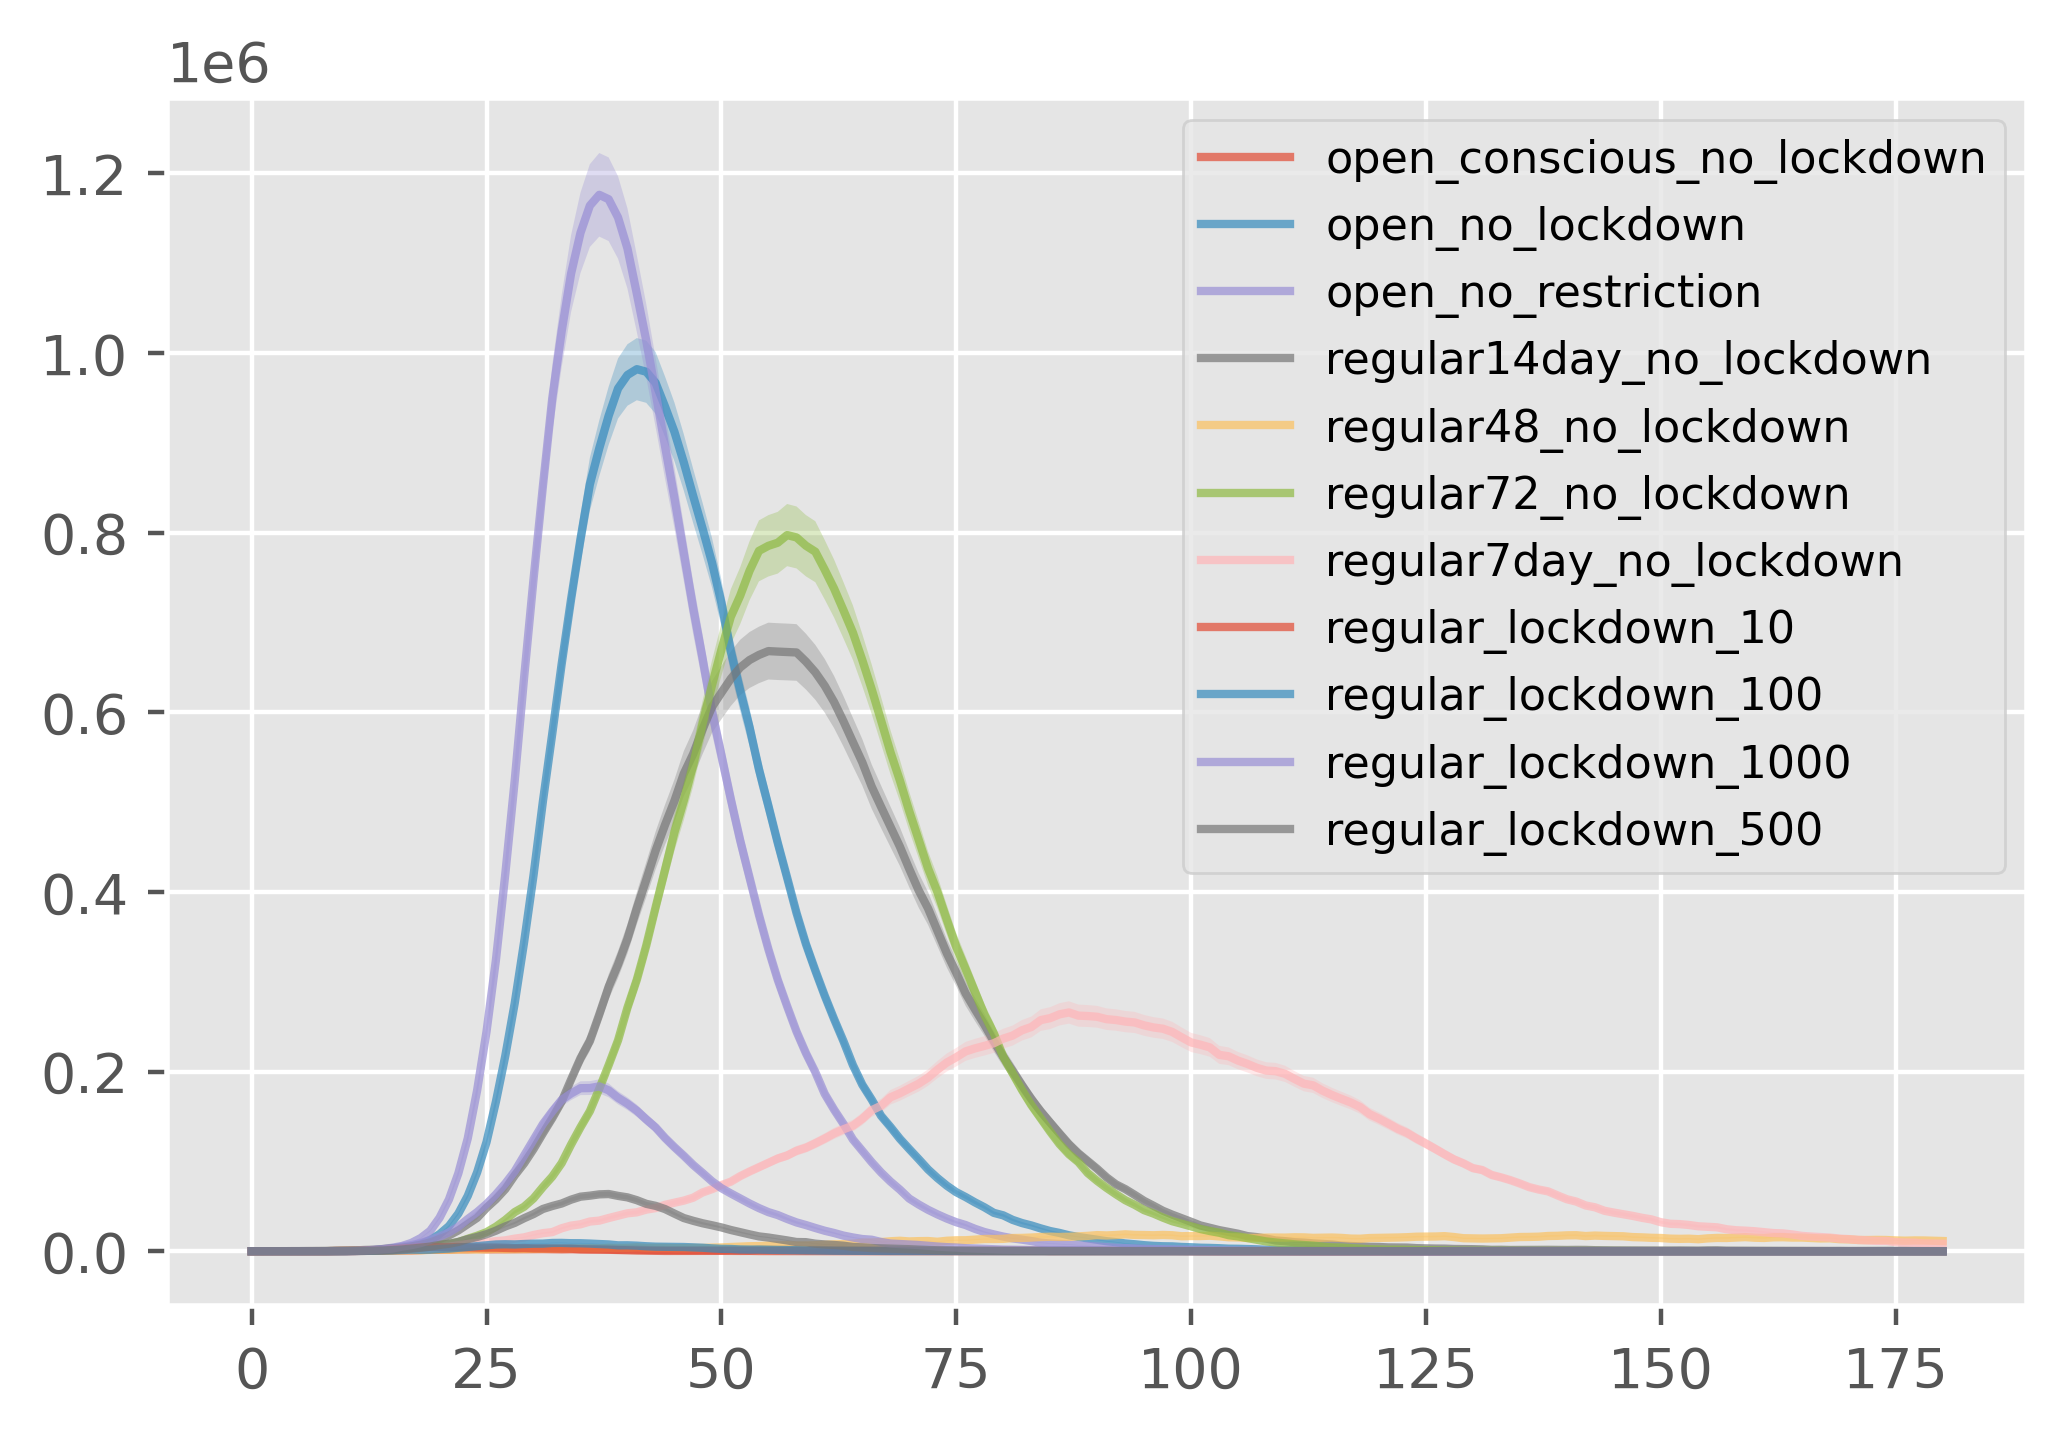

In [37]:
scenarios = os.listdir('new results')
# for asym cases as an example
plt.figure(dpi=400)
lenth = 180
for j in scenarios:
    community_asym = []
    scenario = 'new results/'+j
    simulation_results = os.listdir(scenario)
    for i in simulation_results:
        add = pd.read_csv('new results/'+j+'/'+i,index_col=0)
        community_asym.append(add['ICU'].values)
    community = pd.DataFrame(community_asym)
    subdistrict = pd.DataFrame(extend(community,9,30,50))
    district = pd.DataFrame(extend(subdistrict,7,30,50))
    city = pd.DataFrame(extend(district,9,30,50))
    city_result = city.apply(calculate_mean_std,axis=0)
    upper_bound = city_result.loc[0,:] + city_result.loc[1,:]*1.96/(50**0.5)
    lower_bound = city_result.loc[0,:] - city_result.loc[1,:]*1.96/(50**0.5)
    plt.plot(city_result.loc[0,0:lenth],label= j,alpha=0.7)
    plt.fill_between(x=range(lenth),y1=lower_bound[0:lenth],y2=upper_bound[0:lenth],alpha=0.3)
plt.legend(fontsize=8)

## keep test & quarantine no lockdown

In [75]:
scenarios

['open_conscious_no_lockdown',
 'open_no_lockdown',
 'open_no_restriction',
 'regular14day_no_lockdown',
 'regular48_no_lockdown',
 'regular72_no_lockdown',
 'regular7day_no_lockdown',
 'regular_lockdown_10',
 'regular_lockdown_100',
 'regular_lockdown_1000',
 'regular_lockdown_500']

### infected cases

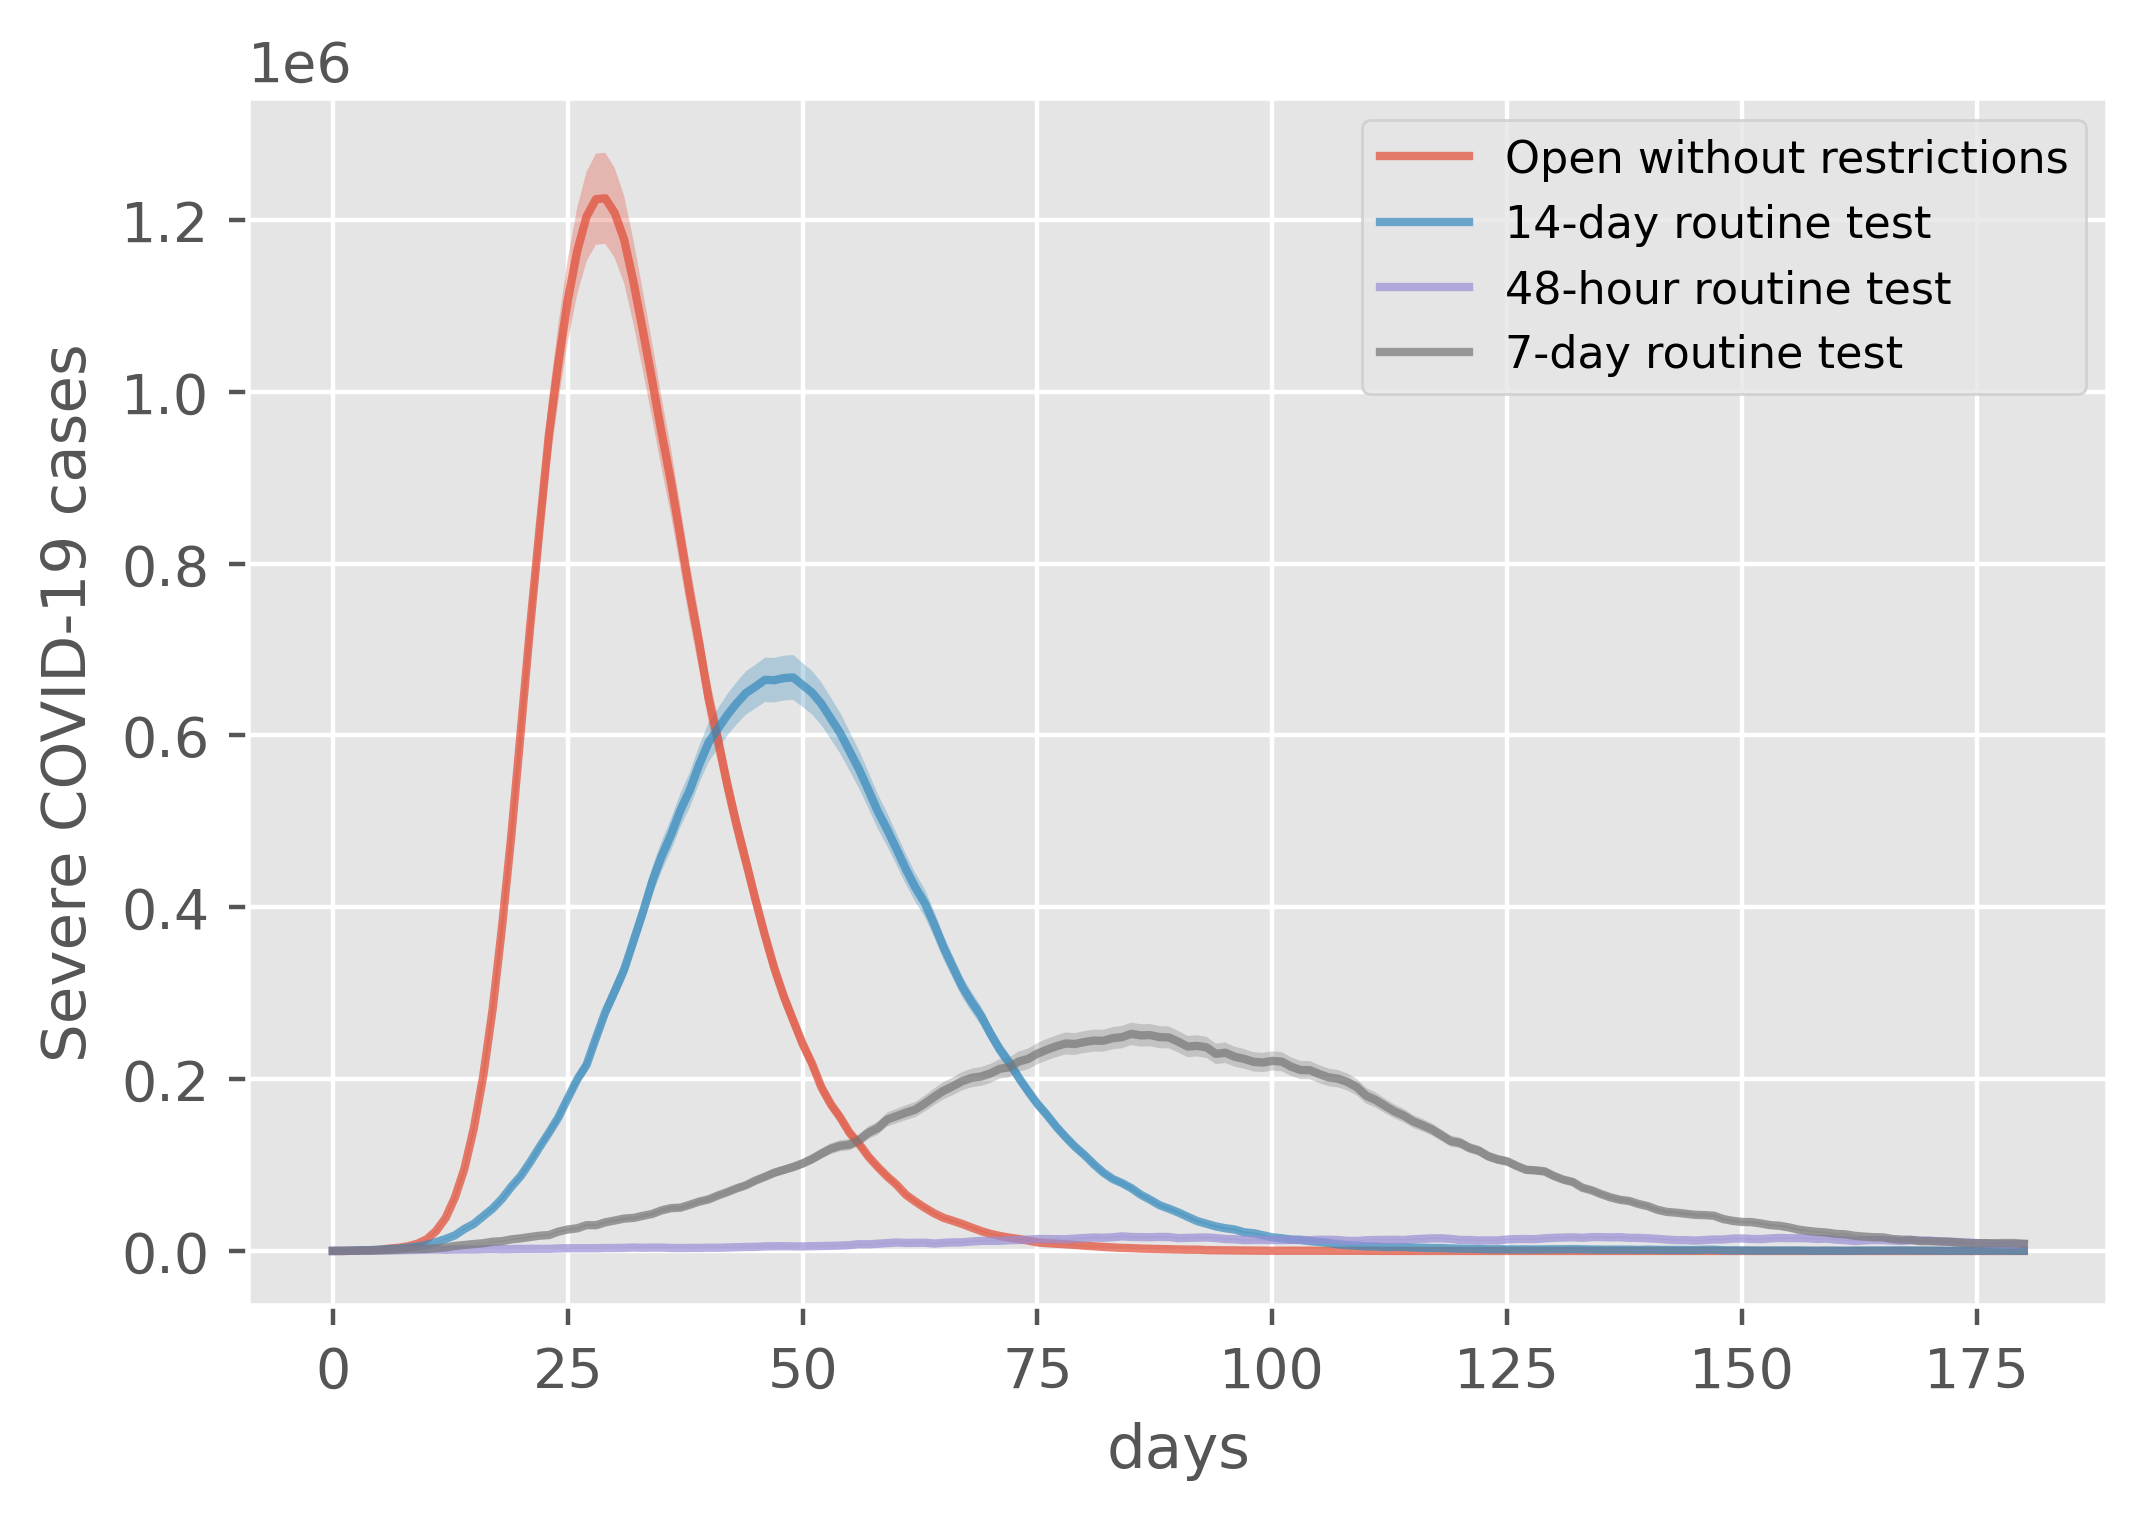

In [138]:
lockdown_scenarios = ['open_no_restriction','regular14day_no_lockdown',
 'regular48_no_lockdown',
 'regular7day_no_lockdown']
                     

labels = ['Open without restrictions','14-day routine test','48-hour routine test','7-day routine test']
plt.figure(dpi=400)
lenth = 180
for j in range(len(lockdown_scenarios)):
    community_case = []
    scenario = 'new results/'+lockdown_scenarios[j]
    simulation_results = os.listdir(scenario)
    for i in simulation_results:
        add = pd.read_csv('new results/'+lockdown_scenarios[j]+'/'+i,index_col=0)
        #community_case.append(np.log(add['ICU'].values+1))
        community_case.append((add['ICU'].values))
        #community_asym.append((add['I_asym']+add['I_sym']+add['ICU']).values)
    community = pd.DataFrame(community_case)
    subdistrict = pd.DataFrame(extend(community,8,30,50))
    district = pd.DataFrame(extend(subdistrict,7,50,50))
    city = pd.DataFrame(extend(district,10,50,50))
    city_result = city.apply(calculate_mean_std,axis=0)
    upper_bound = city_result.loc[0,:] + city_result.loc[1,:]*1.96/(30**0.5)
    lower_bound = city_result.loc[0,:] - city_result.loc[1,:]*1.96/(30**0.5)
    plt.plot(city_result.loc[0,0:lenth],label= labels[j],alpha=0.7)
    plt.fill_between(x=range(lenth),y1=lower_bound[0:lenth],y2=upper_bound[0:lenth],alpha=0.3)
plt.legend(fontsize=8)
plt.xlabel('days',fontsize=11)
plt.ylabel('Severe COVID-19 cases',fontsize=11)
plt.savefig('the existing severe cases in different scenarios',bbox_inches='tight')

### sequela

In [139]:
lockdown_scenarios = ['open_no_restriction','regular14day_no_lockdown','regular7day_no_lockdown','regular48_no_lockdown']

labels = ['Open without restrictions','14-day routine test','7-day routine test','48-hour routine test']

Sequela = ['Sequela 1','Sequela 2','Sequela 3','Sequela 4','Sequela 5','Sequela 6']

Sequela_names = ['Respiratory conditions','Diseases of the nervous system','Mental health burden',
                'Metabolic disorders','Poor general well-being','Cardiovascular conditions']

fig = plt.figure(dpi=800,figsize=(12,8))
axes = fig.subplots(2,2)
lenth = 360
for j in range(len(lockdown_scenarios)):
    community_case = []
    scenario = 'new results/'+lockdown_scenarios[j]
    simulation_results = os.listdir(scenario)
    ax = fig.axes[j]
    ax.set_title('Scenario '+str(j+1)+': '+labels[j],fontsize = 12)
    ax.ticklabel_format(style='sci', scilimits=(-1,2), axis='y')
    for k in range(len(Sequela)):
        for i in simulation_results:
            add = pd.read_csv('new results/'+lockdown_scenarios[j]+'/'+i,index_col=0)
            community_case.append(add[Sequela[k]].values)
            #community_asym.append((add['I_asym']+add['I_sym']+add['ICU']).values)
        community = pd.DataFrame(community_case)
        subdistrict = pd.DataFrame(extend(community,8,30,50))
        district = pd.DataFrame(extend(subdistrict,7,50,50))
        city = pd.DataFrame(extend(district,10,50,50))
        city_result = city.apply(calculate_mean_std,axis=0)
        upper_bound = city_result.loc[0,:] + city_result.loc[1,:]*1.96/(50**0.5)
        lower_bound = city_result.loc[0,:] - city_result.loc[1,:]*1.96/(50**0.5)
        ax.plot(city_result.loc[0,0:lenth],label= Sequela_names[k],alpha=0.8)
        ax.legend(loc='best')
        #ax.fill_between(x=range(lenth),y1=lower_bound[0:lenth],y2=upper_bound[0:lenth],alpha=0.3)
#lines,sequela_labels = fig.axes[-1].get_legend_handles_labels()
#plt.legend(lines,sequela_labels,bbox_to_anchor=(1.5, 1.5),fontsize=11)
fig.text(0.5,0, 'days', ha='center',fontsize=14)
fig.text(0,0.5, 'Cases with sequela conditions', ha='center',rotation='vertical',fontsize=14)
#plt.legend(fontsize=8)
#plt.xlabel('days')
#plt.ylabel('cases')
#plt.title('')
plt.tight_layout()
plt.savefig('the existing sequela conditions in different scenarios',bbox_inches='tight')

In [ ]:
respiratory conditions 3.655%，
diseases of the nervous system 2.644%，
mental health burden 2.888%, 
metabolic disorders 3.008%，
poor general well-being 3.705%，
cardiovascular conditions 4.864%

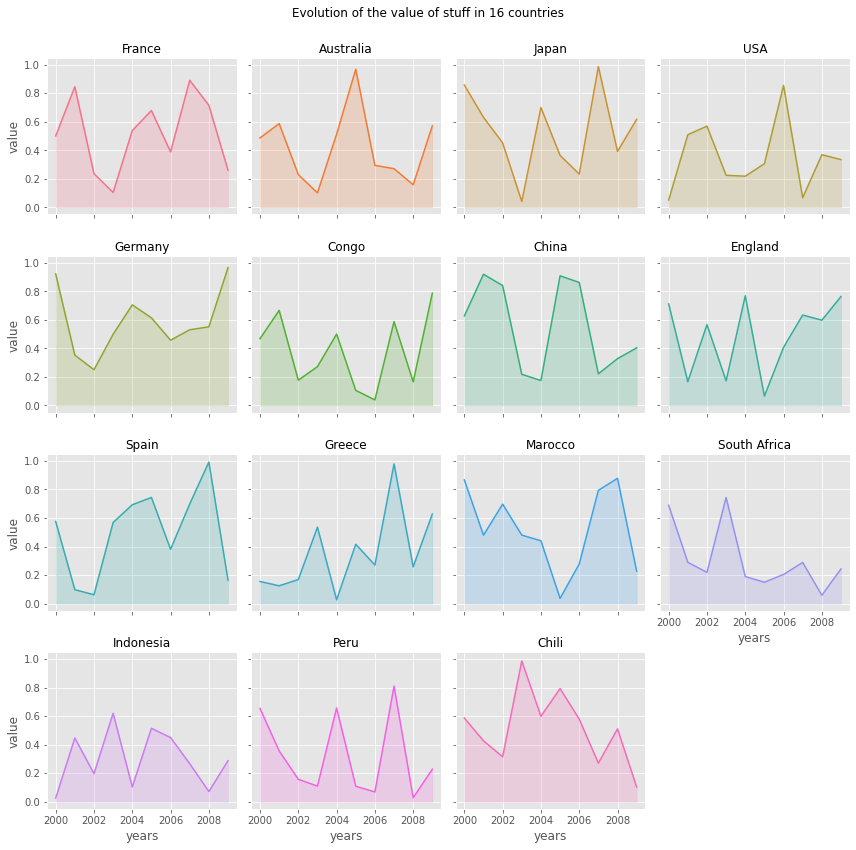

In [98]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

# 创建数据
my_count = ["France", "Australia", "Japan", "USA", "Germany", "Congo", "China", "England", "Spain", "Greece", "Marocco",
            "South Africa", "Indonesia", "Peru", "Chili"]
df = pd.DataFrame({
    "country": np.repeat(my_count, 10),
    "years": list(range(2000, 2010)) * 15,
    "value": np.random.rand(150)
})

# 创建网格
g = sns.FacetGrid(df, col='country', hue='country', col_wrap=4, )

# 添加曲线图
g = g.map(plt.plot, 'years', 'value')

# 面积图
g = g.map(plt.fill_between, 'years', 'value', alpha=0.2).set_titles("{col_name} country")

# 标题
g = g.set_titles("{col_name}")

# 总标题
plt.subplots_adjust(top=0.92)
g = g.fig.suptitle('Evolution of the value of stuff in 16 countries')

# 显示
plt.show()

In [95]:
df

country  years     value
0    France   2000  0.935761
1    France   2001  0.919521
2    France   2002  0.017553
3    France   2003  0.555238
4    France   2004  0.964351
..      ...    ...       ...
155  Brazil   2005  0.471251
156  Brazil   2006  0.660031
157  Brazil   2007  0.207414
158  Brazil   2008  0.818817
159  Brazil   2009  0.206537

[160 rows x 3 columns]

In [ ]:
respiratory conditions 3.655%，
diseases of the nervous system 2.644%，
mental health burden 2.888%, 
metabolic disorders 3.008%，
poor general well-being 3.705%，
cardiovascular conditions 4.864%

## set lockdown

In [127]:
os.listdir('reopen')

['lockdown 10',
 'lockdown 100',
 'lockdown 1000',
 'no lockdown',
 'no lockdown 25',
 'no lockdown 7525',
 'no lockdown 7550',
 'no lockdown 7575']

Text(0, 0.5, 'Severe COVID-19 cases')

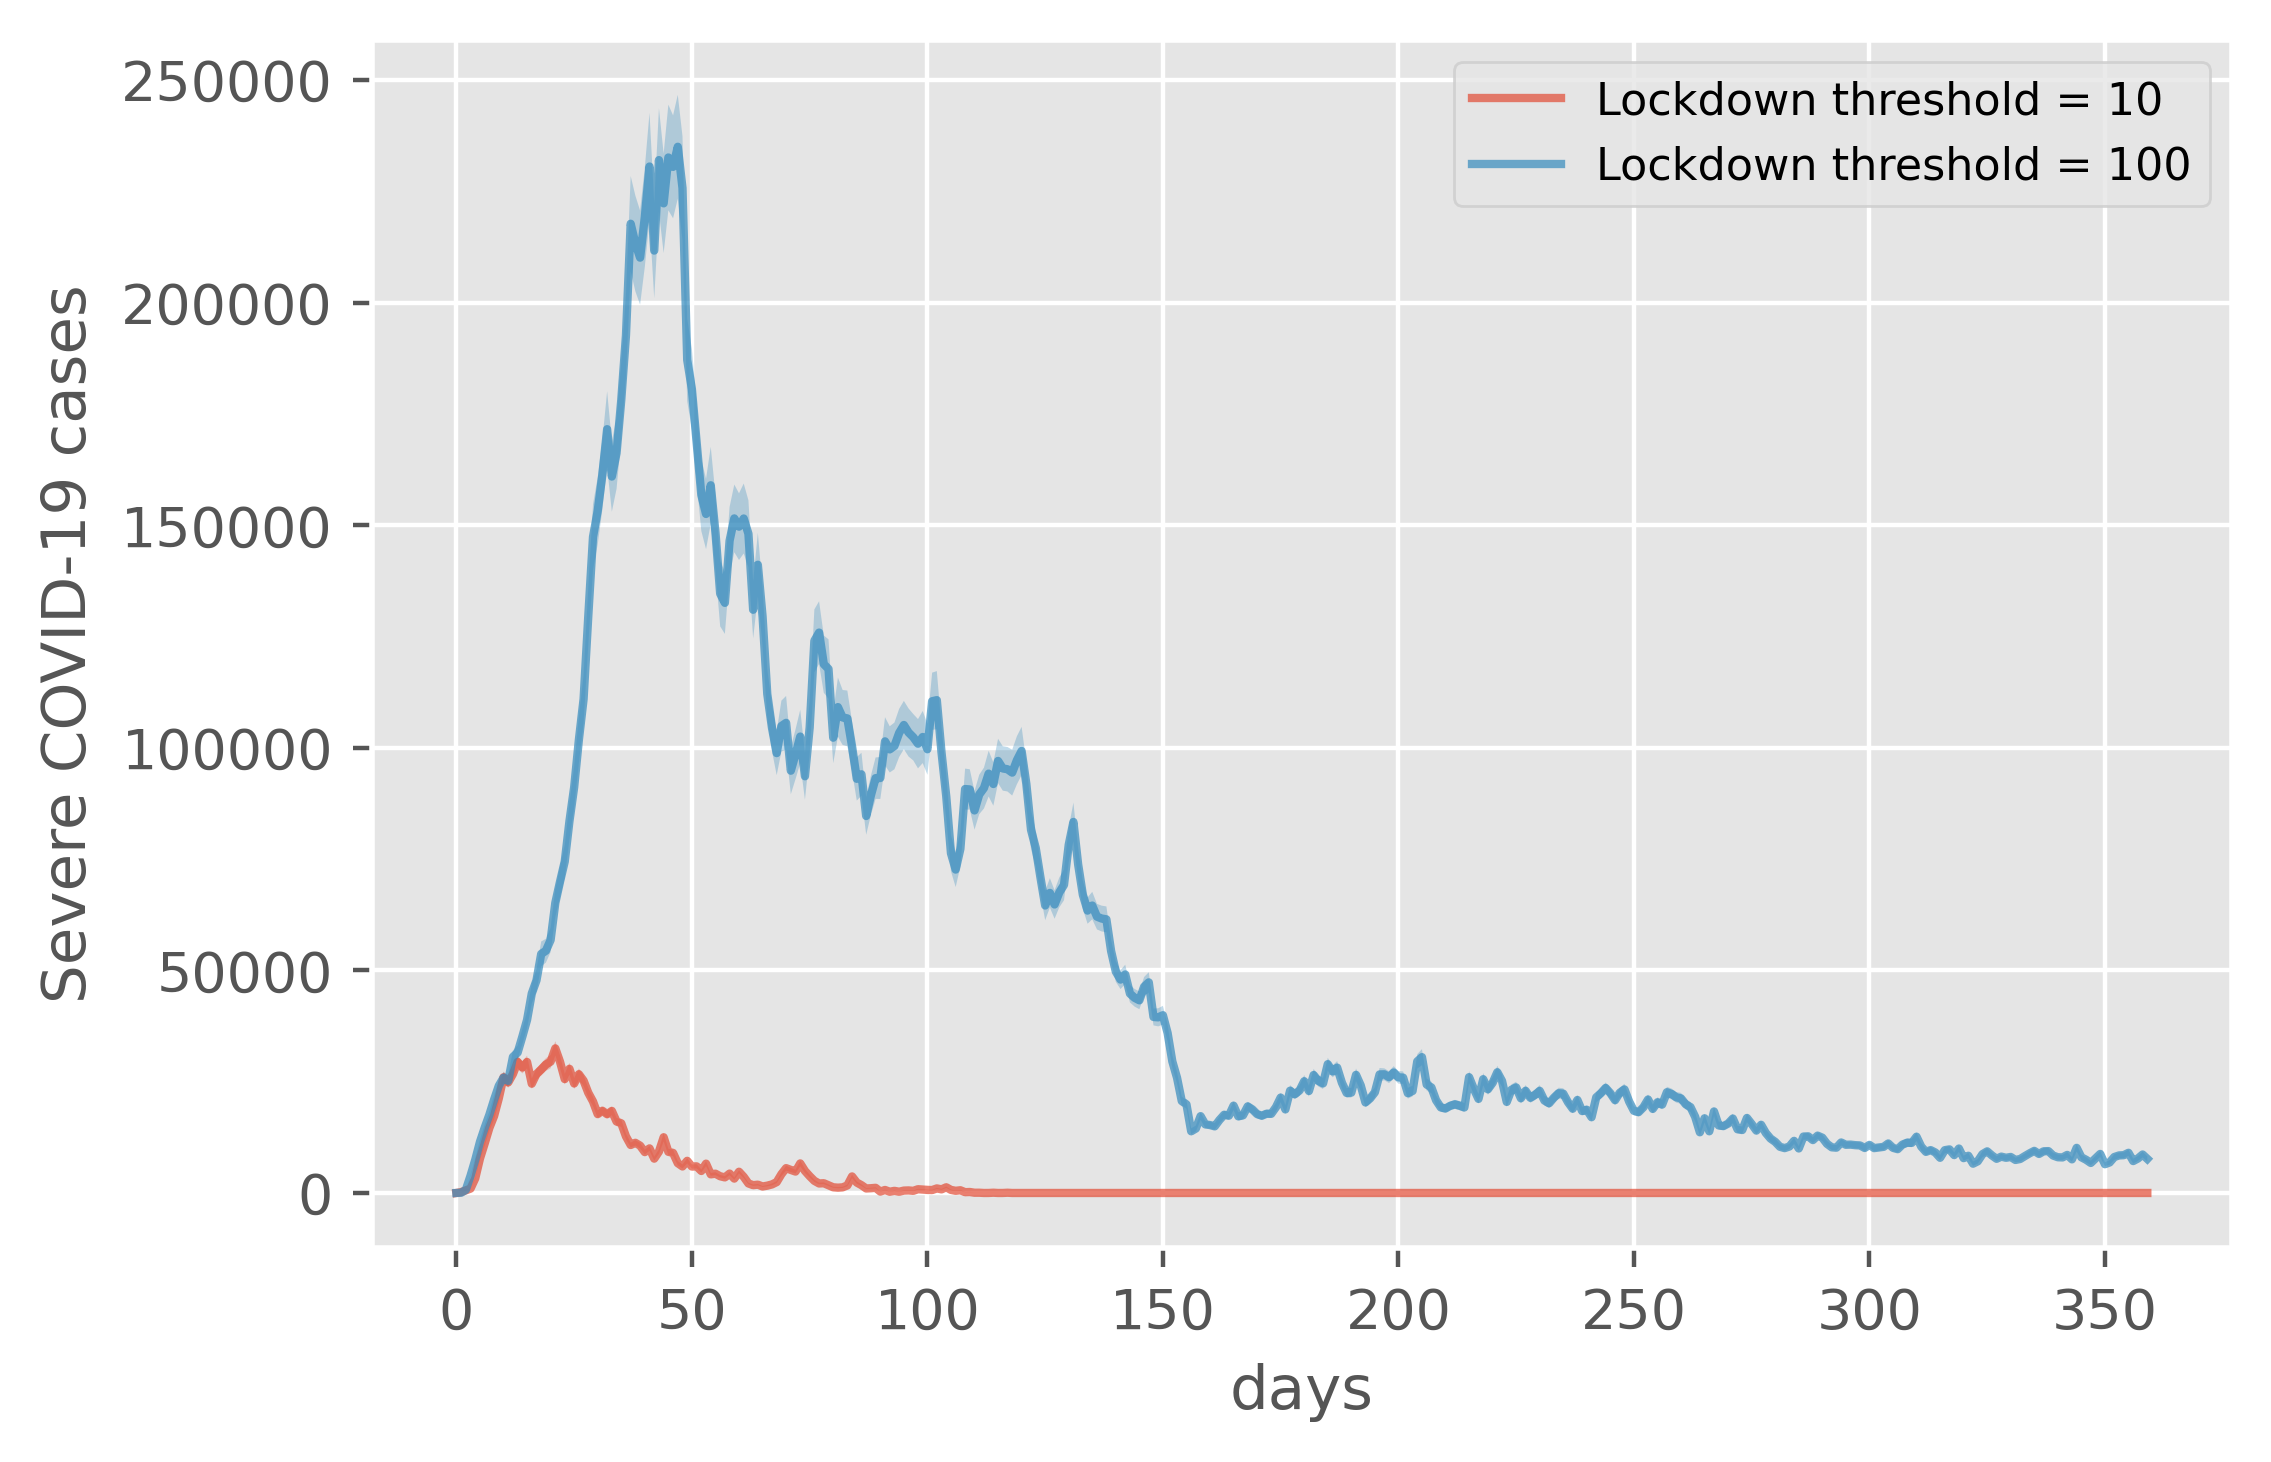

In [136]:
lockdown_scenarios = ['lockdown 10',
 'lockdown 100']
                     

labels = ['7-day routine test & Lockdown threshold as 10',
          '7-day routine test & Lockdown threshold as 100',
          '7-day routine test & Lockdown threshold as 1000']
plt.figure(dpi=400)
lenth = 360
for j in range(len(lockdown_scenarios)):
    community_case = []
    scenario = 'reopen/'+lockdown_scenarios[j]
    simulation_results = os.listdir(scenario)
    for i in simulation_results:
        add = pd.read_csv('reopen/'+lockdown_scenarios[j]+'/'+i,index_col=0)
        #community_case.append(np.log(add['ICU'].values+1))
        community_case.append((add['Daily_infected'].values))
        #community_asym.append((add['I_asym']+add['I_sym']+add['ICU']).values)
    community = pd.DataFrame(community_case)
    subdistrict = pd.DataFrame(extend(community,8,30,50,delta=np.random.randint(0,4)))
    district = pd.DataFrame(extend(subdistrict,7,50,50,delta=np.random.randint(0,4)))
    city = pd.DataFrame(extend(district,10,50,50,delta=np.random.randint(0,4)))
    city_result = city.apply(calculate_mean_std,axis=0)
    upper_bound = city_result.loc[0,:] + city_result.loc[1,:]*1.96/(30**0.5)
    lower_bound = city_result.loc[0,:] - city_result.loc[1,:]*1.96/(30**0.5)
    plt.plot(city_result.loc[0,0:lenth],label= labels[j],alpha=0.7)
    plt.fill_between(x=range(lenth),y1=lower_bound[0:lenth],y2=upper_bound[0:lenth],alpha=0.3)
plt.legend(fontsize=8)
plt.xlabel('days',fontsize=11)
plt.ylabel('Severe COVID-19 cases',fontsize=11)
#plt.savefig('the existing severe cases in different scenarios',bbox_inches='tight')